In [41]:
import pandas 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from  sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score
from  sklearn.metrics import mean_squared_error




PREDICTION ALOGORITHM 1: NEURAL NETWORK

Neural network is a supervised learning algortihtm which means that we provide it with input data containing the independent variables and the output data that contain dependent variable.

Independent variables are:
- GRE Scores( out of 340)
- TOEFL Scores (out of 120)
- University Rating ( out of 5)
- Statement of Purpose (out of 5)
- Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience ( either 0 or 1)


Dependent varibale:
- Chance of acceptance (feature that we would like to predict, 1 for accepted and 0 for rejected)


LOADING DATA

In [42]:
data_file = 'Admission_Predict.csv' 
df = pandas.read_csv(data_file) #reading our data file

df #our data

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


ANALYSING AND PROCESSING OUR DATA

In [43]:
dataset = df.values #converting our dataframe into an array
dataset#our array of dataset

array([[  1.  , 337.  , 118.  , ...,   9.65,   1.  ,   0.92],
       [  2.  , 324.  , 107.  , ...,   8.87,   1.  ,   0.76],
       [  3.  , 316.  , 104.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [398.  , 330.  , 116.  , ...,   9.45,   1.  ,   0.91],
       [399.  , 312.  , 103.  , ...,   8.78,   0.  ,   0.67],
       [400.  , 333.  , 117.  , ...,   9.66,   1.  ,   0.95]])

In [44]:
#Here we split our dataset into input features X and the feature we wish to predict

X = dataset[:,1:8] #here we remove the first column and take the remaining dataset with the exception of the feture we want to predict
Y_ = dataset[:,8] #get our feature that we need to predict

print("feature data: \n", X)
print("labelled data: \n",Y_)

feature data: 
 [[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [333.   117.     4.   ...   4.     9.66   1.  ]]
labelled data: 
 [0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.

CONVERTING ACCEPTANCE CHANCE TO CLASSIFICATION THROUGH ROUNDING UP

In [45]:
Y = [] #list to store new rounded up acceptance chance column values
threshold = 0.5 # our threshold for rounding

#convert values to 0 = not accepted and 1 = accepted

for i in Y_: #loop through label data 
    if i < threshold:
        i = 0 #set to 0 
        Y.append(i) #store updated values
    
    else:
        i = 1  #otherwise set to 1
        Y.append(i) #store updated values
Y = np.array(Y)
Y = Y.reshape(X.shape[0],1)


In [46]:
#here we process our data to make sure that the scale of the input features are similar
#we do this to avoid difficulties for the initialization of the neutral network

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X) #Scaling the dataset so that all input features lie between 0 and 1 inclusive
print("X scaled: \n",X_scale)

X scaled: 
 [[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.8        0.85714286 0.75       ... 0.875      0.84935897 1.        ]
 [0.44       0.39285714 0.5        ... 0.75       0.63461538 0.        ]
 [0.86       0.89285714 0.75       ... 0.75       0.91666667 1.        ]]


DIVIDING THE DATA

7 features

- X-training data = 204 (60%)
- X- validation data = 68 (20%)
- X- testing data = 68 (20%)

Chance of admission feature

- Y-training data = 204 (60%)
- Y- validation data = 68 (20%)
- Y- testing data = 68 (20%)

In [47]:
# validation and testing takes 40% of the original data and training takes 60% and randomizing
X_training,X_validation_test, Y_training_label, Y_validation_test =  train_test_split(X_scale, Y, test_size = 0.4,random_state = 2) # here we split trainig data and validation/testing data into two

#spliting validation and testing and randomizing

X_validation, X_testing, Y_validation_label, Y_testing_label = train_test_split(X_validation_test,Y_validation_test,test_size = 0.5,random_state = 2)

#standardize the dataset

print("----------------------------------------------")
print("Shape of training data: ",X_training.shape)
print("Shape of training label: ",Y_training_label.shape)
print("Shape of validation data: ",X_validation.shape)
print("Shape of validation label: ",Y_validation_label.shape)
print("Shape of testing data: ",X_testing.shape)
print("Shape of testing label: ",Y_testing_label.shape)
print("----------------------------------------------")

----------------------------------------------
Shape of training data:  (240, 7)
Shape of training label:  (240, 1)
Shape of validation data:  (80, 7)
Shape of validation label:  (80, 1)
Shape of testing data:  (80, 7)
Shape of testing label:  (80, 1)
----------------------------------------------


NEURAL NETWORK

Training.............................................
confusion matrix
--------
|6 | 16|
|1 | 217|
--------
accuracy: :92.91666666666667%


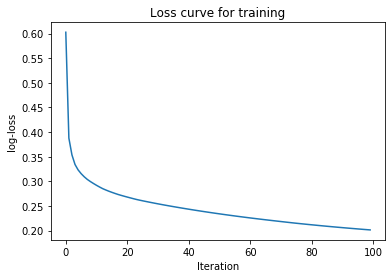

Validation.............................................
confusion matrix
--------
|3 | 6|
|3 | 68|
--------
accuracy: :88.75%
Testing.............................................
confusion matrix
--------
|0 | 2|
|0 | 78|
--------
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values : :1
Predicted values : :1 | Actual values 

In [48]:
class NeuralNet():
        #class takes in list that stores our network architecture, learning rate and iterations
        # layers[7 input features, 8 nodes for hidden layer, 1 output]
        
        def __init__(self, layers = [7,20,1], l_rate = 0.001, iter = 100):
            self.X = None
            self.Y = None
            self.params = {} #dictionary to store weights
            self.loss = []
            self.layers = layers
            self.l_rate = l_rate
            self.iter = iter
        
        #initializes weights for the network
        #we use unifrom distribution for our weights and store them in the params dictionary 
        def init_weights(self):
            
            np.random.seed(1) #seed that random number of generator
            self.params['W1'] = np.random.randn(self.layers[0], self.layers[1]) #array of shape(7,20)
            self.params['b1'] = np.random.randn(self.layers[1],) #vector of size 20
            self.params['W2'] = np.random.randn(self.layers[1], self.layers[2]) #array of shape(20,1)
            self.params['b2'] = np.random.randn(self.layers[2],)#vector of size 1, the output
            
        #here we gonna have a function for loss function
        # it measures how good our neural network is predicting so that it can adjust the weights
        
        def entropy_loss(self,y, y_hat):
            n = len(y) #number of samples
            loss = -1/n * (np.sum(np.multiply(np.log(y_hat),y) + np.multiply((1 - y), np.log(1 - y_hat))))
            return loss
            
        #for our network we will use an activation function (ReLU function) for hidden layer
        #This function compares a value with zero then return the value passed to if if it is greater that zero
        #It will perform threshold operation to each value input
        
        def ReLU(self,Z):
            return np.maximum(0,Z)
        
        #we will also use sigmoid function for our ouput layer
        #takes in input value and squashes it to a real valued output between 0 and 1
        
        def sigmoid(self, Z):
            return 1.0/(1.0 + np.exp(-Z))
        
            
        #forward propagation
        def forward_prop(self):
            
            #perfom all dot product and addition usinf weights and biases
            
            Z1 = self.X.dot(self.params['W1']) + self.params['b1']  #weighted sum between input and first layer's weights and add bias
            A1 = self.ReLU(Z1) # passing Z1 into activation function
            Z2 = A1.dot(self.params['W2']) + self.params['b2'] #weighted sum between output of A1 and second layer's weights and add bias
            yhat = self.sigmoid(Z2) #passing Z2 into activation function
            loss = self.entropy_loss(self.y,yhat) #loss between predicted output and sigmoid resulyHat
            
            #save all calculated parameters
            
            self.params['Z1'] = Z1
            self.params['Z2'] = Z2
            self.params['A1'] = A1
            
            return yhat,loss #return predicted value and loss we will use in backpropagation
        
        #backpropagtion to train our network by updating weights and biases
            

        def back_prop(self,yhat):

            #compute derivative
            def dReLU(x):
                x[x <=0 ] = 0
                x[x > 0 ] = 1
                return x

         #dl_wrt means loss with respect to 
            dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat))) 
            dl_wrt_sig = yhat * (1-yhat)
            dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

            dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
            dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
            dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

            dl_wrt_z1 = dl_wrt_A1 * dReLU(self.params['Z1'])
            dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
            dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)

            #update weights and bias

            self.params['W1'] = self.params['W1'] - self.l_rate * dl_wrt_w1 
            self.params['b1'] = self.params['b1'] - self.l_rate * dl_wrt_b1
            self.params['W2'] = self.params['W2'] - self.l_rate * dl_wrt_w2 
            self.params['b2'] = self.params['b2'] - self.l_rate * dl_wrt_b2

        #function for predicting

            
        def predicting(self, X):
            
            Z1 = X.dot(self.params['W1']) + self.params['b1']
            A1 = self.ReLU(Z1)
            Z2 = A1.dot(self.params['W2']) + self.params['b2']
            pred = self.sigmoid(Z2)
            return np.round(pred)              

        #function for marmalising y_hat
        
        def normalize(self, arr):
            new_arr = []
            threshold = 0.5 # our threshold for rounding

            #convert values to 0 = not accepted and 1 = accepted

            for i in arr: #loop through label data 
                if i < threshold:
                    i = 0 #set to 0 
                    new_arr.append(i) #store updated values

                else:
                    i = 1  #otherwise set to 1
                    new_arr.append(i) #store updated values
            new_arr = np.array(new_arr)
            return new_arr
        
        #function for training

        def training(self, X, y):
            
            self.X = X
            self.y = y
            self.init_weights() #initialize weights and bias


            for i in range(self.iter):
                yhat,loss = self.forward_prop() 
                self.loss.append(loss)
                self.back_prop(yhat)

            return yhat


     

        def plotting_loss(self):

            plt.plot(self.loss)
            plt.xlabel("Iteration")
            plt.ylabel("log-loss")
            plt.title("Loss curve for training")
            plt.show()
            
        def confusion_mat(self, actual, predicted):
            cm = confusion_matrix(actual,np.round(predicted))
            print("confusion matrix")
            print("--------")
            print("|" + str(cm[0][0]) + " | " + str(cm[0][1]) + "|")
            print("|" + str(cm[1][0]) + " | " + str(cm[1][1]) + "|")
            print ("--------")
            
        def error(self,actual,predicted):
            error = mean_squared_error(predicted,actual)
            
            return error
                
            
            
            
       
        
        def print_values(self, actual, predicted):
            
            for i in range(1,len(actual)):
                print("Predicted values : :{}".format(predicted[i]) + " | " + "Actual values : :{}".format(actual[i][0]))
            
            
            
NN = NeuralNet()



print('Training.............................................')
yhat = NN.training(X_training,Y_training_label)
yhat = NN.normalize(yhat)
NN.confusion_mat(Y_training_label,yhat)
print("accuracy: :{}".format(accuracy_score(Y_training_label,yhat)*100) +"%")
NN.plotting_loss()


print('Validation.............................................')
yhat = NN.training(X_validation,Y_validation_label)
yhat = NN.normalize(yhat)
NN.confusion_mat(Y_validation_label,yhat)
print("accuracy: :{}".format(accuracy_score(Y_validation_label,yhat)*100) +"%")



print('Testing.............................................')
yhat = NN.training(X_testing,Y_testing_label)
yhat = NN.normalize(yhat)
NN.confusion_mat(Y_testing_label,yhat)
NN.print_values(Y_testing_label,yhat)
print("accuracy: :{}".format(accuracy_score(Y_testing_label,yhat)*100) +"%")
print("Mean Square Error = {}".format(NN.error(Y_testing_label,yhat)))

